## Garbage Analaysis: Insight Gathering
## Hasbi Thaufik Oktodila

### Overview

### Langkah-langkah pengerjaan:
- Data Loading
- Data Processing
    - Memeriksa informasi data
    - Memeriksa nilai Null
    - Menghapus nilai Null
- Data Exploration
    - Melakukan eksplorasi data untuk memilih site yang akan diteliti



### Import Library

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

### Data Loading

In [3]:
df = pd.read_csv('h8dsft_P0GC2_hasbi-thaufik-oktodila.csv')
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF


### Data Processing

##### Melihat jumlah row

In [4]:
df.shape

(26157, 5)

#### Mengecek Jumlah dan Nama Kolom

In [5]:
df.columns.value_counts()

report_date     1
load_time       1
load_type       1
load_weight     1
dropoff_site    1
dtype: int64

#### Mengecek Tipe Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


#### Mengecek Data Null

In [41]:
df.isna().value_counts()

report_date  load_time  load_type  load_weight  dropoff_site
False        False      False      False        False           25109
                                   True         False            1048
dtype: int64

In [50]:
df = df.dropna(axis = 0)     # Mengahpus baris yang berisi Null, karena kolom load_weight masih dibutuhkan
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
5,2021-01-02,2021-01-02 11:47:00 UTC,TIRES,940.0,MRF
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
11,2021-01-02,2021-01-02 05:44:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND


In [51]:
# df[df.duplicated()] # hanya duplikat

In [52]:
# df[df.duplicated(keep=False)] # keseluruhan data yang terduplikasi

In [53]:
# df[df.duplicated()].value_counts()

In [19]:
# df.duplicated().value_counts()

False    25712
True       445
dtype: int64

In [13]:
# sumdup = df[df.duplicated()].value_counts()
# sumdup.sum()

26

In [21]:
# dfclean1 = df.drop_duplicates()
# dfclean1.shape

(25712, 5)

In [23]:
# dfclean1.describe().T

,count,mean,std,min,25%,50%,75%,max
load_weight,25083.0,12229.467191,7135.372881,0.0,7060.0,11300.0,16380.0,245540.0


<AxesSubplot:>

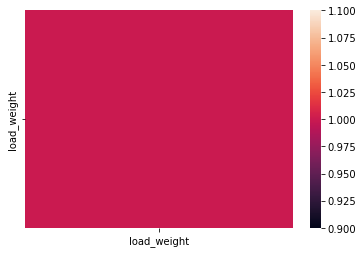

In [27]:
sns.heatmap(data=dfclean1.corr())

In [28]:
dfclean1.head(1)

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK


In [29]:
df['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

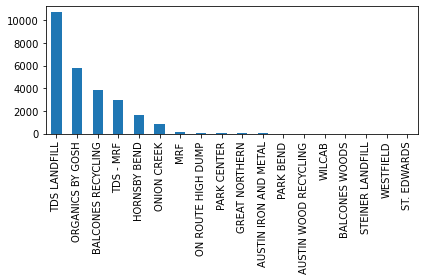

In [40]:
df['dropoff_site'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

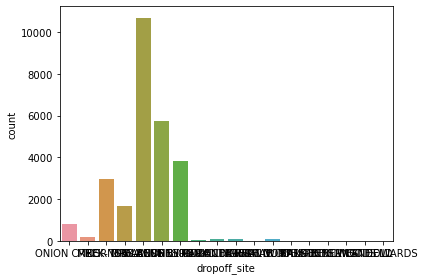

In [34]:
sns.countplot(data=df, x='dropoff_site')
plt.tight_layout()

AttributeError: 'Rectangle' object has no property 'autopct'

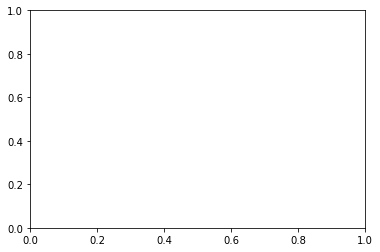

In [38]:
df['dropoff_site'].value_counts().plot.bar(autopct='%1.1f%%', labels = 'Drop Off Site Popularity', legend=True)
